<a href="https://colab.research.google.com/github/FRNEYRA10/FRNEYRA10/blob/main/Ecu_de_onda_m%C3%A9todo_expl%C3%ADcito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO 1
GRÁFICAS 2D Y 3D DE LA SOLUCIÓN HASTA "t= 0.50"

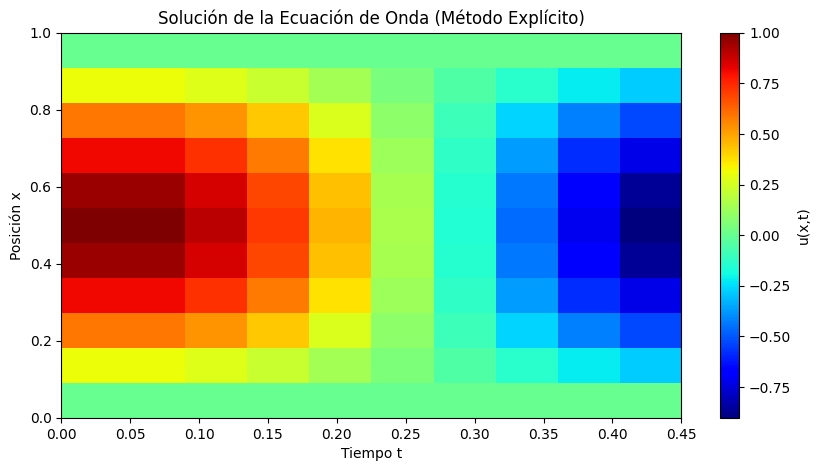

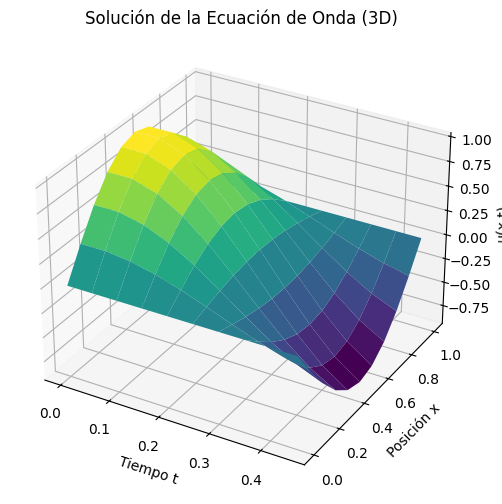

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definición de parámetros
h = 0.1
k = 0.05
x = np.arange(0, 1.1, h)
t = np.arange(0, 0.50, k)
N = len(x)
M = len(t)

# Inicialización de u
u = np.zeros((N, M))

# Condiciones Iniciales
for j in range(1, N-1):
    u[j, 0] = np.sin(np.pi * x[j])
    u[j, 1] = u[j, 0]

# Realizamos el cálculo
for n in range(1, M-1):
    for j in range(1, N-1):
        u[j, n+1] = 2 * u[j, n] - u[j, n-1] + (4 * (k ** 2 / h ** 2)) * (u[j+1, n] - 2 * u[j, n] + u[j-1, n])

# Gráfica 2D
plt.figure(figsize=(10, 5))
plt.imshow(u, aspect='auto', extent=[t.min(), t.max(), x.min(), x.max()], origin='lower', cmap='jet')
plt.colorbar(label='u(x,t)')
plt.xlabel('Tiempo t')
plt.ylabel('Posición x')
plt.title('Solución de la Ecuación de Onda (Método Explícito)')
plt.show()

# Gráfica 3D
T_grid, X_grid = np.meshgrid(t, x)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T_grid, X_grid, u, cmap='viridis')
ax.set_xlabel('Tiempo t')
ax.set_ylabel('Posición x')
ax.set_zlabel('u(x,t)')
ax.set_title('Solución de la Ecuación de Onda (3D)')
plt.show()

EJERCICIO 2

COMPARAR LOS VALORES CORRESPONDIENTES SU SOLUCIÓN NUMÉRICA CON LOS RESULTADOS NUMÉRICOS QUE ESTAN EN LA TABLA 12.6
GRÁFICAR Y CALCULAR EL ERROR.

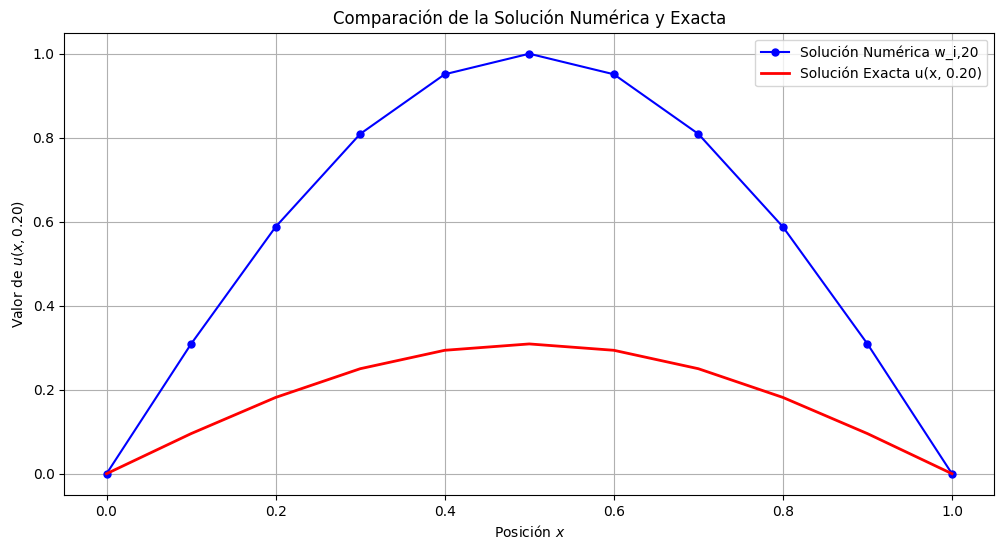

Posición (x) ||| Sol. Numérica (w_i,20) ||| Sol. Exacta (u(x, 0.20)) ||| Error ||| % Error
0.0            ||| 0.0                     ||| 0.0                           ||| 0.0   ||| 0.00000   
0.1            ||| 0.3090169944            ||| 0.09549150281252629           ||| 0.21352549158747375 ||| 223.60680 
0.2            ||| 0.5877852523            ||| 0.18163563200134025           ||| 0.40614962029865975 ||| 223.60680 
0.30000000000000004 ||| 0.8090169944            ||| 0.25000000000000006           ||| 0.5590169943999999 ||| 223.60680 
0.4            ||| 0.9510565163            ||| 0.29389262614623657           ||| 0.6571638901537634 ||| 223.60680 
0.5            ||| 1.0                     ||| 0.30901699437494745           ||| 0.6909830056250525 ||| 223.60680 
0.6000000000000001 ||| 0.9510565163            ||| 0.29389262614623657           ||| 0.6571638901537634 ||| 223.60680 
0.7000000000000001 ||| 0.8090169944            ||| 0.25000000000000006           ||| 0.5590169943999999 ||

/tmp/ipython-input-891922667.py:34: RuntimeWarning: invalid value encountered in divide
  error_percentage = np.where(u_exact != 0, (error / np.abs(u_exact)) * 100, 0.0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros
h = 0.1
x = np.arange(0, 1.1, h)

# Valores de w_i,20 de la tabla proporcionada
w_i_20 = np.array([
    0.0000000000, 0.3090169944, 0.5877852523, 0.8090169944,
    0.9510565163, 1.0000000000, 0.9510565163, 0.8090169944,
    0.5877852523, 0.3090169944, 0.0000000000
])

# Calculando la solución exacta para t = 0.20
t_exact = 0.20
u_exact = np.sin(np.pi * x) * np.cos(2 * np.pi * t_exact)

# Graficando los resultados
plt.figure(figsize=(12, 6))
plt.plot(x, w_i_20, 'bo-', label='Solución Numérica w_i,20', markersize=5)
plt.plot(x, u_exact, 'r-', label='Solución Exacta u(x, 0.20)', linewidth=2)
plt.title('Comparación de la Solución Numérica y Exacta')
plt.xlabel('Posición $x$')
plt.ylabel('Valor de $u(x, 0.20)$')
plt.legend()
plt.grid()
plt.show()

# Calculando el error
error = np.abs(w_i_20 - u_exact)

# Calcular el error porcentual, manejando la división por cero
error_percentage = np.where(u_exact != 0, (error / np.abs(u_exact)) * 100, 0.0)

# Imprimiendo errores
print("Posición (x) ||| Sol. Numérica (w_i,20) ||| Sol. Exacta (u(x, 0.20)) ||| Error ||| % Error")
for i in range(len(x)):
    print(f"{x[i]:<14} ||| {w_i_20[i]:<23} ||| {u_exact[i]:<29} ||| {error[i]:<5} ||| {error_percentage[i]:<10.5f}")

EJERCICIO 3

COMPARAMOS LOS MISMOS VALORES  CONTRA LA SOLUCIÓN EXACTA DE LA ECUACIÓN.
GRÁFICAR Y CALCULAR EL ERROR
DISCUTIR LA COMPARACIÓN  

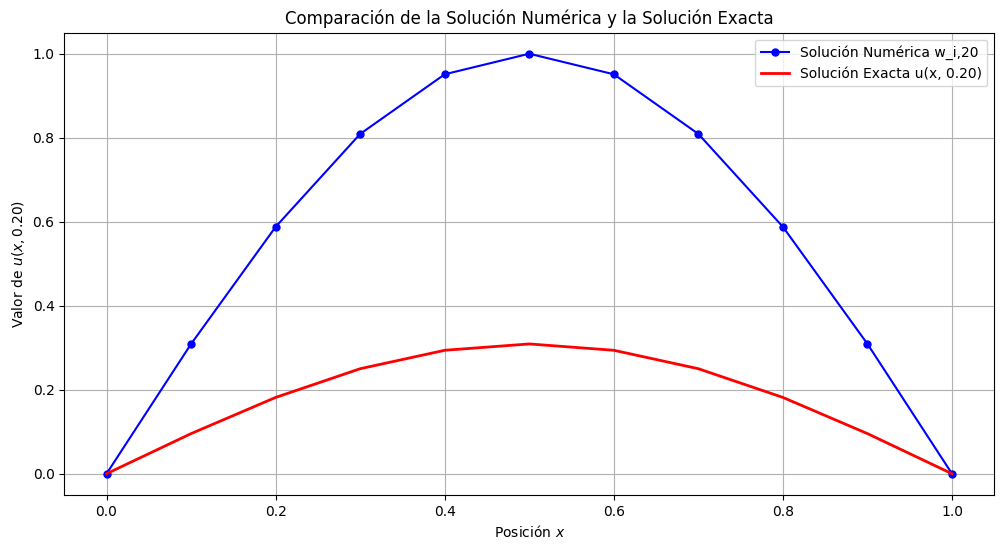

Posición (x) | Sol. Numérica (w_i,20) | Sol. Exacta (u(x, 0.20)) | Error ||| % Error
0.0            | 0.0                     | 0.0                           | 0.0   ||| 0.00      
0.1            | 0.3090169944            | 0.09549150281252629           | 0.21352549158747375 ||| 223.61    
0.2            | 0.5877852523            | 0.18163563200134025           | 0.40614962029865975 ||| 223.61    
0.30000000000000004 | 0.8090169944            | 0.25000000000000006           | 0.5590169943999999 ||| 223.61    
0.4            | 0.9510565163            | 0.29389262614623657           | 0.6571638901537634 ||| 223.61    
0.5            | 1.0                     | 0.30901699437494745           | 0.6909830056250525 ||| 223.61    
0.6000000000000001 | 0.9510565163            | 0.29389262614623657           | 0.6571638901537634 ||| 223.61    
0.7000000000000001 | 0.8090169944            | 0.25000000000000006           | 0.5590169943999999 ||| 223.61    
0.8            | 0.5877852523            

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros
h = 0.1
x = np.arange(0, 1.1, h)

# Valores de w_i,20 de la tabla proporcionada
w_i_20 = np.array([
    0.0000000000, 0.3090169944, 0.5877852523, 0.8090169944,
    0.9510565163, 1.0000000000, 0.9510565163, 0.8090169944,
    0.5877852523, 0.3090169944, 0.0000000000])

# Calculando la solución exacta para t = 0.20
t_exact = 0.20
u_exact = np.sin(np.pi * x) * np.cos(2 * np.pi * t_exact)

# Graficando los resultados
plt.figure(figsize=(12, 6))
plt.plot(x, w_i_20, 'bo-', label='Solución Numérica w_i,20', markersize=5)
plt.plot(x, u_exact, 'r-', label='Solución Exacta u(x, 0.20)', linewidth=2)
plt.title('Comparación de la Solución Numérica y la Solución Exacta')
plt.xlabel('Posición $x$')
plt.ylabel('Valor de $u(x, 0.20)$')
plt.legend()
plt.grid()
plt.show()

# Calculando el error
error = np.abs(w_i_20 - u_exact)
error_percentage = np.zeros_like(error)

# Evitar división por cero
with np.errstate(divide='ignore', invalid='ignore'):
    error_percentage = np.where(u_exact != 0, (error / np.abs(u_exact)) * 100, 0)

    # Imprimiendo errores
    print("Posición (x) | Sol. Numérica (w_i,20) | Sol. Exacta (u(x, 0.20)) | Error ||| % Error")
    for i in range(len(x)):
        print(f"{x[i]:<14} | {w_i_20[i]:<23} | {u_exact[i]:<29} | {error[i]:<5} ||| {error_percentage[i]:<10.2f}")

Dada la comparación  se observa que esta lejos de la solución exacta  de la ecuación

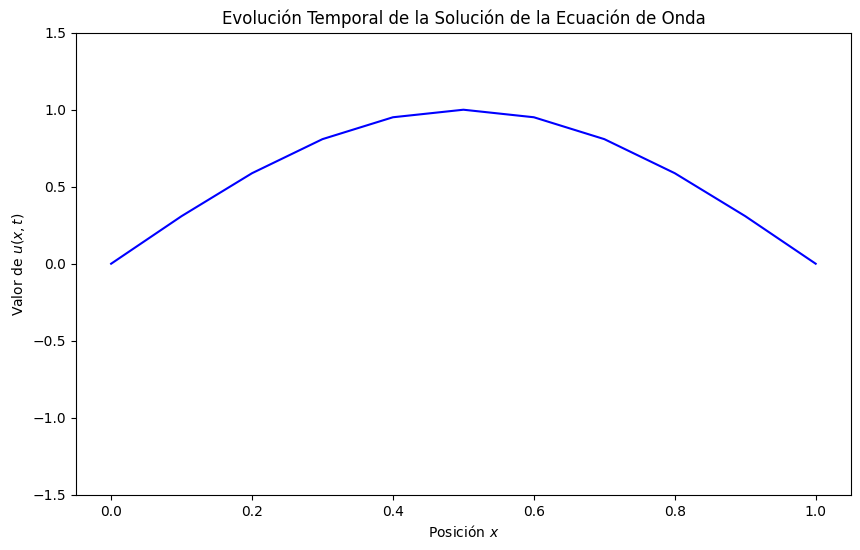

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Definición de parámetros
h = 0.1
k = 0.05
x = np.arange(0, 1.1, h)
t_max = 0.5
t_values = np.arange(0, t_max + k, k)

# Inicialización de la solución
N = len(x)
M = len(t_values)
u = np.zeros((N, M))

# Condiciones Iniciales
for j in range(1, N-1):
    u[j, 0] = np.sin(np.pi * x[j])
    u[j, 1] = u[j, 0]

# Cálculo de la solución a lo largo del tiempo
for n in range(1, M-1):
    for j in range(1, N-1):
        u[j, n+1] = 2 * u[j, n] - u[j, n-1] + (4 * (k ** 2 / h ** 2)) * (u[j+1, n] - 2 * u[j, n] + u[j-1, n])

# Configuración de la gráfica para animación
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, u[:, 0], 'b-') # Plot initial state
ax.set_ylim(-1.5, 1.5)
ax.set_title("Evolución Temporal de la Solución de la Ecuación de Onda")
ax.set_xlabel('Posición $x$')
ax.set_ylabel('Valor de $u(x,t)$')

# Función de actualización para la animación
def update(frame):
    line.set_ydata(u[:, frame])  # Actualiza los datos de la línea
    return line,

# Creación de la animación
ani = FuncAnimation(fig, update, frames=M, blit=True, interval=100)
plt.show()